In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Brief description of the data set and a summary of its attributes
This data is about the classification of stroke on the basis of certian features related to person own.

In [2]:
df = pd.read_csv("train_2v.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
features = df.columns
features

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


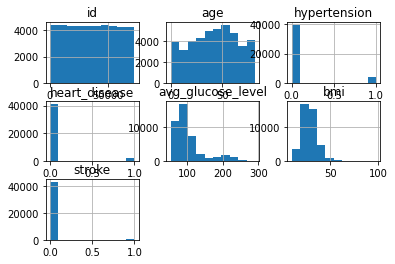

In [7]:
df.hist();

In [8]:
Num_features = [feature for feature in features if df[feature].dtype != object]
Cat_features = [feature for feature in features if df[feature].dtype == object]

In [9]:
Num_features

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [10]:
Cat_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [11]:
df  = df.fillna(method="bfill")

# Initial plan for data exploration
In data exploration, we'll plot histograms, boxplots , correaltion matrix,subplot of all numerical features and see countplot of the categorical variables

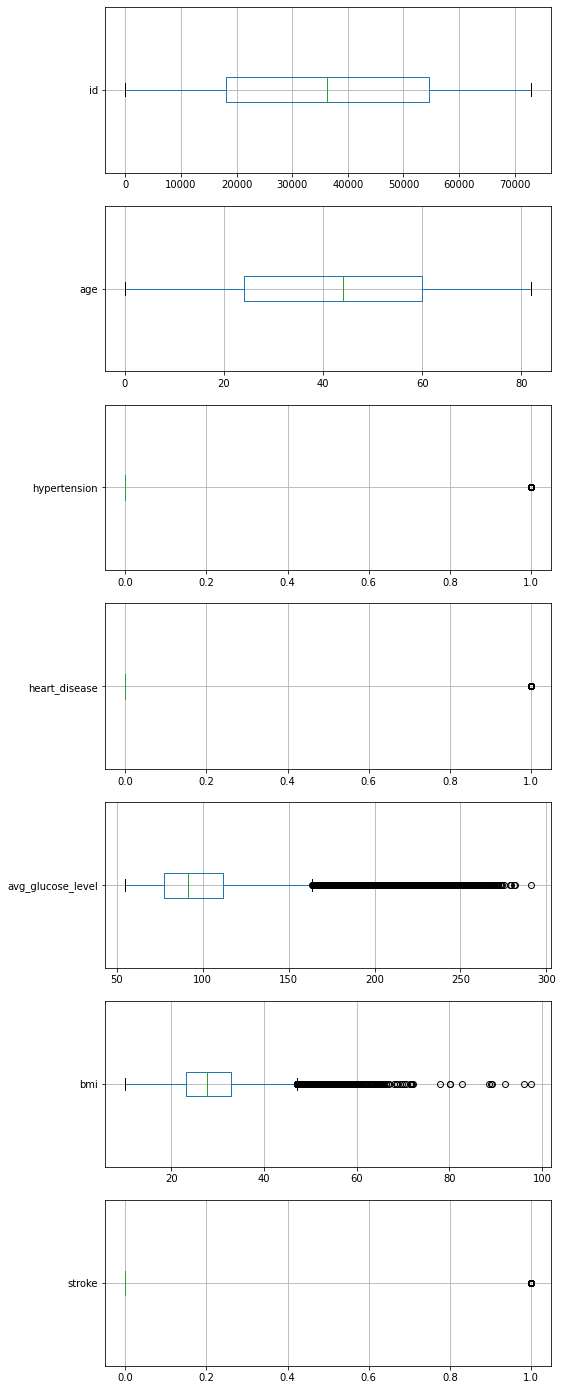

In [12]:
fig, axes = plt.subplots(7,1 ,figsize=(8,25))

for i,c in enumerate(Num_features):
    f = df[[c]].boxplot(ax=axes[i], vert=False)

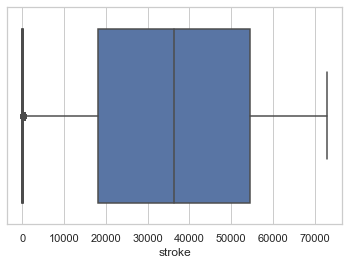

In [13]:
import seaborn as sns

sns.set_theme(style="whitegrid")
for i, c in enumerate(Num_features):
    ax = sns.boxplot(x = df[c])

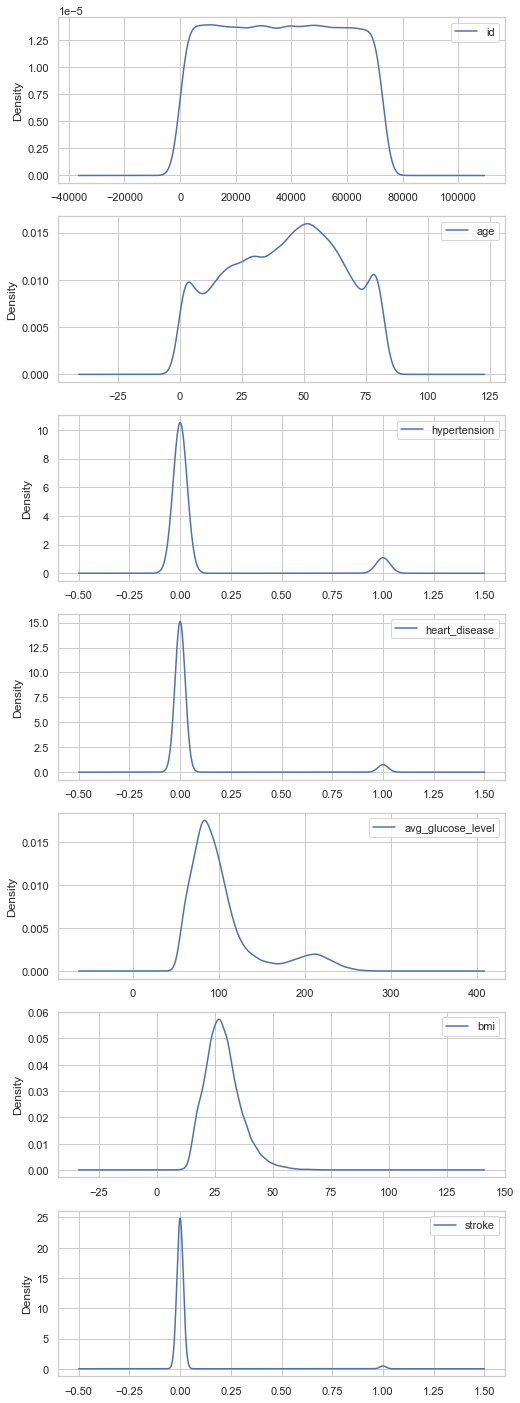

In [14]:
fig, axes = plt.subplots(7,1 ,figsize=(8,25))

for i,c in enumerate(Num_features):
    f = df[[c]].plot(kind = 'kde', ax=axes[i])

In [15]:
df_mean = df[Num_features].mean()
df_mean

id                   36326.142350
age                     42.217894
hypertension             0.093571
heart_disease            0.047512
avg_glucose_level      104.482750
bmi                     28.599878
stroke                   0.018041
dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

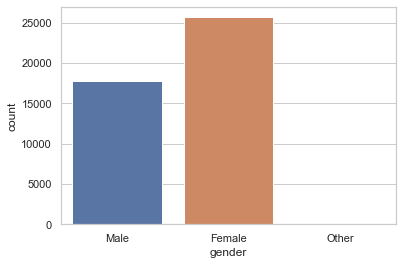

In [16]:
# For categorical features

sns.countplot(x="gender",data=df)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

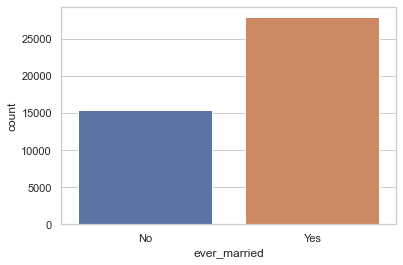

In [17]:
sns.countplot(x="ever_married",data=df)

<AxesSubplot:xlabel='work_type', ylabel='count'>

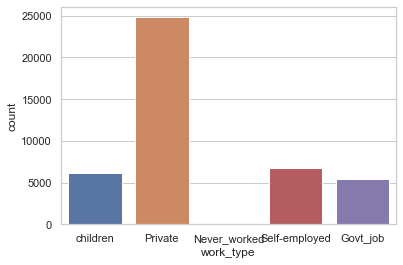

In [18]:
sns.countplot(x = "work_type",data = df)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

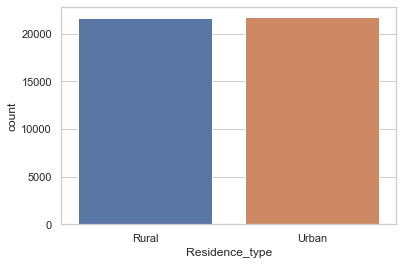

In [19]:
sns.countplot(x = "Residence_type",data = df)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

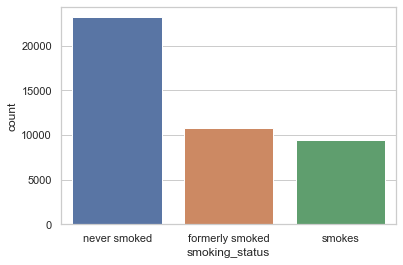

In [20]:
sns.countplot(x = "smoking_status",data = df)

In [21]:
df_mean = df[Num_features].mean()
df_mean

id                   36326.142350
age                     42.217894
hypertension             0.093571
heart_disease            0.047512
avg_glucose_level      104.482750
bmi                     28.599878
stroke                   0.018041
dtype: float64

In [22]:
df_n = df.groupby('gender').mean()
df_n

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,36296.722346,42.737703,0.087785,0.032963,103.203537,28.737136,0.016793
Male,36369.278267,41.469727,0.102009,0.068608,106.344914,28.401303,0.019860
Other,35464.636364,34.909091,0.000000,0.000000,88.666364,28.309091,0.000000


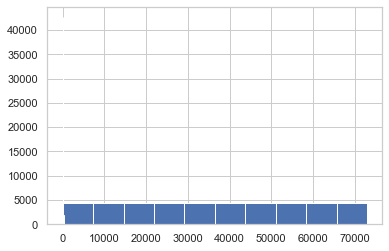

In [23]:
for r in Num_features:
    df[r].hist()

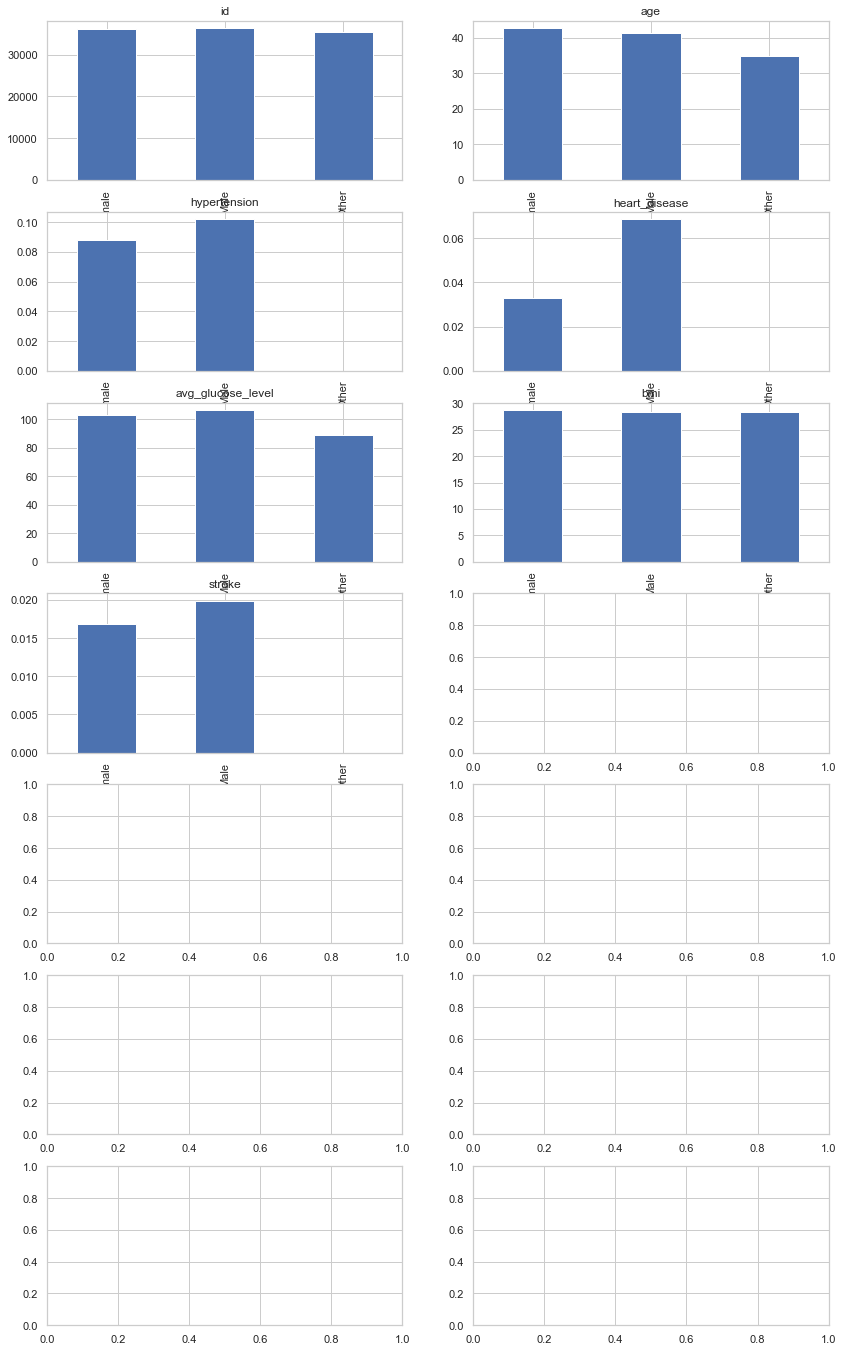

In [24]:
#df_col = df_n.columns
# Relationship between all features mean and our targer feature
fix, axes = plt.subplots(7,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(df[Num_features]):
    df_n = df.groupby('gender')[c].mean()
    plot = df_n.plot(kind='bar',title=c,ax=axes[i])


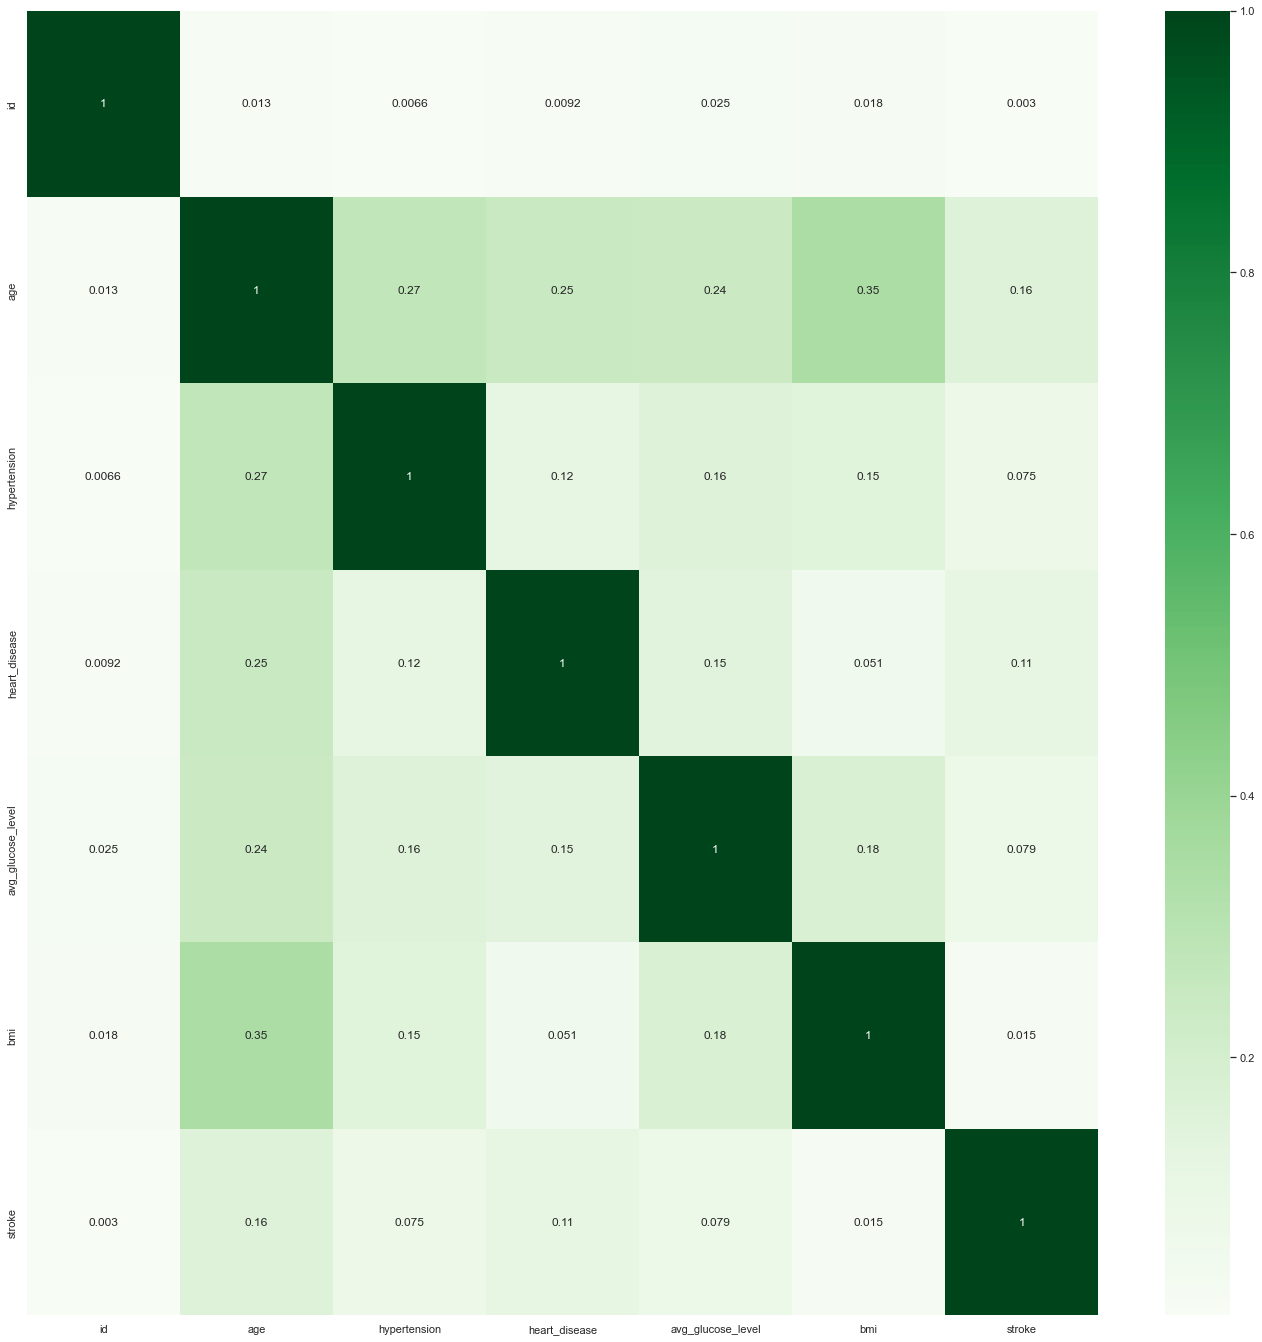

In [25]:
# Pearson Correlation matrix

corr_matrix = df[Num_features].corr(method='pearson')
plt.figure(figsize=(24,24))
correc = sns.heatmap(corr_matrix, annot=True, cmap = 'Greens')

In [26]:
# Find features with high and low correlation
df['gender'] = df.gender.map({"Male":0, "Female":1})
df['ever_married'] = df.ever_married.map({"No":0, "Yes":1})
df['work_type'] = df.work_type.map({"childeren":0, "Private":1,"Never_worked":2,"Self-employed":3,"Govt_job":4})
df['Residence_type'] = df.Residence_type.map({"Rural":0, "Urban":1})
df['smoking_status'] = df.smoking_status.map({"never smoked":0, "formerly smoked":1,"smokes":2})

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,0.0,3.0,0,0,0,NaN,0,95.12,18.0,0,0
1,30468,0.0,58.0,1,0,1,1.0,1,87.96,39.2,0,0
2,16523,1.0,8.0,0,0,0,1.0,1,110.89,17.6,1,0
3,56543,1.0,70.0,0,0,1,1.0,0,69.04,35.9,1,0
4,46136,0.0,14.0,0,0,0,2.0,0,161.28,19.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,1.0,10.0,0,0,0,NaN,1,58.64,20.4,0,0
43396,5450,1.0,56.0,0,0,1,4.0,1,213.61,55.4,1,0
43397,28375,1.0,82.0,1,0,1,1.0,1,91.94,28.9,1,0
43398,27973,0.0,40.0,0,0,1,1.0,1,99.16,33.2,0,0


In [27]:
det = df.corr()

In [28]:
det['gender'].sort_values(ascending = False)

gender               1.000000
ever_married         0.031073
age                  0.027676
bmi                  0.021266
Residence_type      -0.001587
id                  -0.001692
work_type           -0.009758
stroke              -0.011324
hypertension        -0.024005
avg_glucose_level   -0.035815
smoking_status      -0.066606
heart_disease       -0.082353
Name: gender, dtype: float64

# Actions taken for data cleaning and feature engineering
1) All null values were found and replaced by the before fill method (as the percentage of null was less than 0.5%) 2) Numerical and categorical variables were seperated 3) After plotting correlation matrix, we dropped least significant features(with relation to the feature 'gender') 4) Robust scalar was used to scale every feature{ also removing outliers}

# Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
1) Correlation and significance of all features were found out 2) distribution of values in all features were seen 3) Relationship between all features mean and our targer feature was seen

In [29]:
df_final = df.drop('id',1)
df_final

C:\Users\Zulfiqar\AppData\Local\Temp/ipykernel_2912/3122964181.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_final = df.drop('id',1)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,3.0,0,0,0,NaN,0,95.12,18.0,0,0
1,0.0,58.0,1,0,1,1.0,1,87.96,39.2,0,0
2,1.0,8.0,0,0,0,1.0,1,110.89,17.6,1,0
3,1.0,70.0,0,0,1,1.0,0,69.04,35.9,1,0
4,0.0,14.0,0,0,0,2.0,0,161.28,19.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1.0,10.0,0,0,0,NaN,1,58.64,20.4,0,0
43396,1.0,56.0,0,0,1,4.0,1,213.61,55.4,1,0
43397,1.0,82.0,1,0,1,1.0,1,91.94,28.9,1,0
43398,0.0,40.0,0,0,1,1.0,1,99.16,33.2,0,0


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'work_type'}>],
       [<AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>]],
      dtype=object)

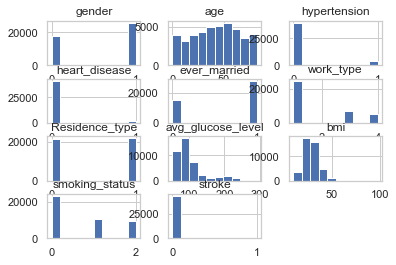

In [30]:
df_final.hist()

                 0             1             2             3             4   \
count  43389.000000  43400.000000  43400.000000  43400.000000  43400.000000   
mean      -0.408491     -0.049503      0.093571      0.047512     -0.356267   
std        0.491560      0.625546      0.291235      0.212733      0.478901   
min       -1.000000     -1.220000      0.000000      0.000000     -1.000000   
25%       -1.000000     -0.555556      0.000000      0.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.444444      0.000000      0.000000      0.000000   
max        0.000000      1.055556      1.000000      1.000000      0.000000   

                 5             6             7             8             9   \
count  37244.000000  43400.000000  43400.000000  43400.000000  43400.000000   
mean       0.403864     -0.498710      0.373668      0.093737      0.683502   
std        0.590870      0.500004      1.248530    

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>, <AxesSubplot:>]],
      dtype=object)

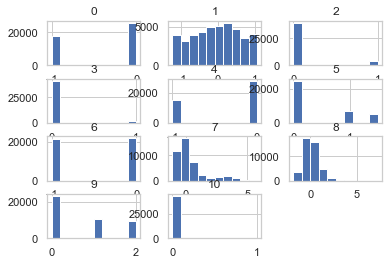

In [31]:
from sklearn.preprocessing import RobustScaler
from pandas import DataFrame

transformation = RobustScaler()
X = transformation.fit_transform(df_final)

dataset = DataFrame(X)

print(dataset.describe())

dataset.hist()

# Findings
Some of the features are correlated with the target feature `stroke` such as `smoking_status`,`hypertention`,`heardisease` and `age`

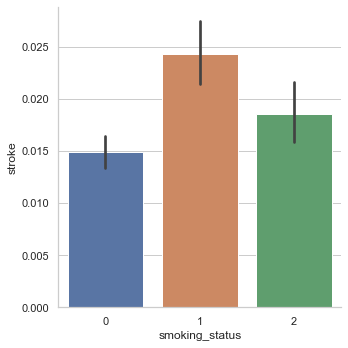

In [32]:
sns.catplot(x='smoking_status', y='stroke', kind="bar", data=df)

# Conducting a formal significance test for one of the hypotheses and discuss the results

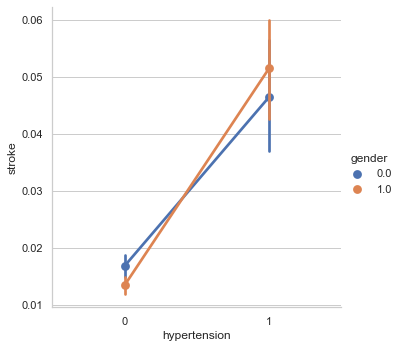

In [34]:
sns.catplot(x="hypertension", y="stroke", hue="gender", kind="point", data=df)

# Suggestions for next steps in analyzing this data

1) Maybe power transformations can be tried to make data more gaussian like distribution 2) Outlier removal algorithms Density based clustering algorithms can be used to clean the data

# A paragraph that summarizes the quality of this data set and a request for additional data if needed

The quality of data was average. THere are many highly coorelated features to our target 'stroke'. Also, the mean and median of the features was far away, thus indicating that outliers may be presesnt in it.{for that we used robust scaler}. The dataset was more inclined towards male {the value of almost all features was more inclined towards males than females(subplots of averages)}